Confusion Matrix:
[[35  0]
 [ 2  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.60      0.75         5

    accuracy                           0.95        40
   macro avg       0.97      0.80      0.86        40
weighted avg       0.95      0.95      0.94        40



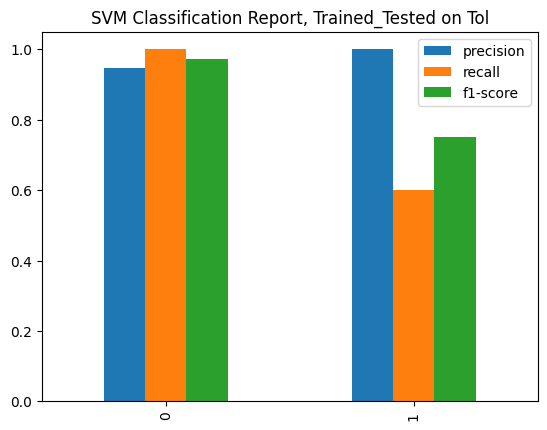

In [11]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
# 1. Load the dataset
data = pd.read_csv("full_Table_HIGH_QUAL.csv")
# drop file_name from this
data = data.drop('file_name', axis = 1)
data = data.fillna(0)

# remove the inf and replace with 0 
data = data.replace([np.inf, -np.inf], 0)
# replace nan with 0 
# just drop the rows with nan
# 2. Data Preprocessing
# Assuming 'cell_group' is your target column
X = data.drop('cell_group', axis=1)  # Features
y = data['cell_group']  # Target variable

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 4. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train the SVM Model
svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)
svm_model.fit(X_train, y_train)

# 6. Evaluate the model
y_pred = svm_model.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# store the classification report and turn into barchart
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('SVM Classification Report, Trained_Tested on Tol')
# 7. Visualize Results (for 2-dimensional data)
# This is just a sample for 2D data. Modify as per your need if you have more features
if X_train.shape[1] == 2:
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()


In [12]:
# which columns in data have nan
data = pd.read_csv("All_Groups.csv")

# which columns have nan
print(data.columns[data.isna().any()].tolist())

['degree_distribution_1', 'degree_distribution_3', 'degree_distribution_4', 'degree_distribution_5', 'degree_distribution_7', 'degree_distribution_0', 'degree_distribution_6', 'degree_distribution_2', 'degree_distribution_8', 'degree_distribution_9', 'degree_distribution_11', 'degree_distribution_10']


Text(0.5, 1.0, 'Distribution of y_train for Tol')

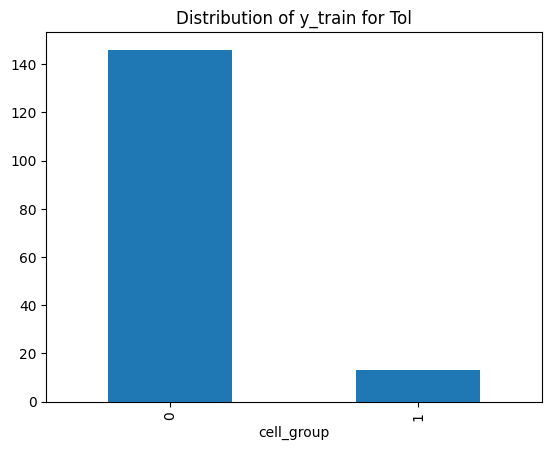

In [13]:
# get distribution of y_train as a bar chart
y_train.value_counts().plot(kind='bar')
plt.title('Distribution of y_train for Tol')

For 
Confusion Matrix:
[[35  0]
 [ 3  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.40      0.57         5

    accuracy                           0.93        40
   macro avg       0.96      0.70      0.77        40
weighted avg       0.93      0.93      0.91        40



Text(0.5, 1.0, 'RF Classification Report, Trained_Tested on Tol')

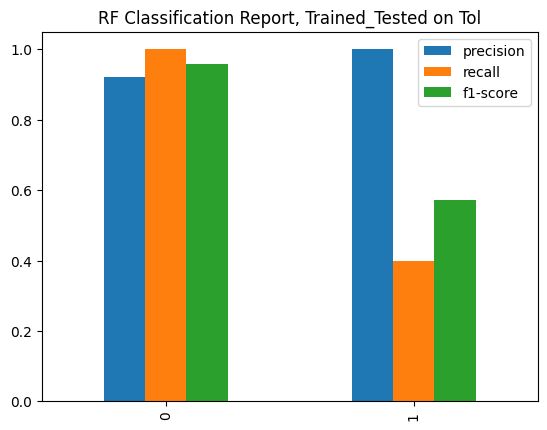

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your data (steps 1 and 2)

# 3. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train, y_train)

# 5. Evaluate the model
y_pred = rf_model.predict(X_test)
print("For ")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# store the classification report and turn into barchart
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('RF Classification Report, Trained_Tested on Tol')

In [18]:
def prep_for_test(data): 
    data = data.drop('file_name', axis = 1)
    new_y_real = data['cell_group']
    data = data.drop('cell_group', axis=1)
    data = data.fillna(0)
#   drop values that are infinite 
    data = data.replace([np.inf, -np.inf], 0)
    return data, new_y_real


new_X_test = pd.read_csv('All_Groups.csv')
new_X_test, new_y = prep_for_test(new_X_test)
new_X_test = new_X_test[X_test.columns] # making the order the same



Confusion Matrix:
[[ 195 6927]
 [ 162 4794]]

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.03      0.05      7122
           1       0.41      0.97      0.57      4956

    accuracy                           0.41     12078
   macro avg       0.48      0.50      0.31     12078
weighted avg       0.49      0.41      0.27     12078



/home/mitosim2/miniconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'SVM Classification Report, Trained on Tol, Tested on All')

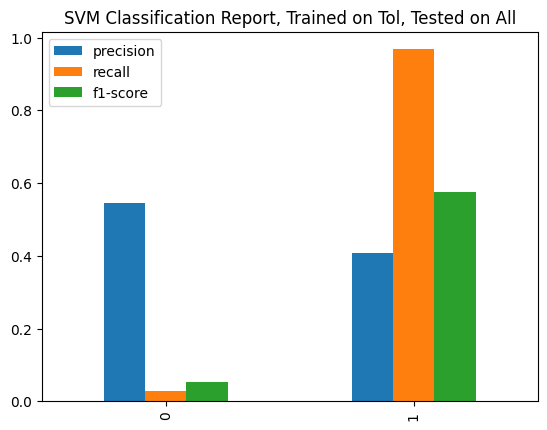

In [19]:
# see how accurate new_pred and new_y are 
# filli n the Nan with 0s
new_pred = svm_model.predict(new_X_test)
print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('SVM Classification Report, Trained on Tol, Tested on All')

Confusion Matrix:
[[7058   64]
 [4840  116]]

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.99      0.74      7122
           1       0.64      0.02      0.05      4956

    accuracy                           0.59     12078
   macro avg       0.62      0.51      0.39     12078
weighted avg       0.61      0.59      0.46     12078



Text(0.5, 1.0, 'RF Classification Report, Trained on Tol, Tested on All')

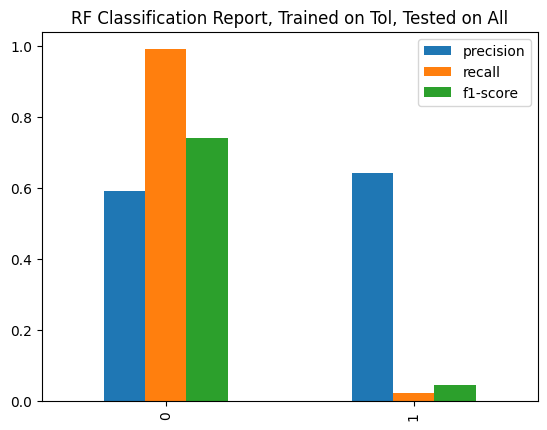

In [20]:
# see how accurate new_pred and new_y are 
new_pred = rf_model.predict(new_X_test)

print("Confusion Matrix:")
print(confusion_matrix(new_y, new_pred))

print("\nClassification Report:")
print(classification_report(new_y, new_pred))


# store the classification report and turn into barchart
report = classification_report(new_y, new_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
# draw a plot to show this
df = df.drop('support', axis = 1)
# draw a plot to show this for 0, 1 a
df.iloc[0:2].plot(kind='bar')
plt.title('RF Classification Report, Trained on Tol, Tested on All')